題目：
阿竹是一個旅館銷售人員，負責某間旅館的銷售業務，他想針對旅館網頁的訪客進行廣告優惠，但是行銷經費有限，只能針對較有可能消費的訪客進行廣告。阿竹提供了旅館網站的Google Analytics流量統計資料，請資料工程師幫助阿竹找出可能進行消費的訪客。

In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.neural_network import MLPRegressor
from sklearn.neural_network import MLPClassifier
#loading training data
train = pd.read_csv("train.csv")
train.head()
#10 numerical + 8 categorical attribues

,ID,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,8773,0,0.000000,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.4,2,3.0,11.0,3.0,7.0,2.0,0,0
1,6709,0,0.000000,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,9,1.0,10.0,0.0,8.0,2.0,0,0
2,1463,9,301.000000,0,0.0,38,2621.621429,0.021212,0.044508,10.721172,0.0,8,1.0,10.0,0.0,14.0,2.0,0,0
3,4095,2,13.333333,0,0.0,105,2062.443592,0.012205,0.020276,0.000000,0.6,2,5.0,10.0,0.0,7.0,2.0,0,0
4,3346,0,0.000000,0,0.0,19,220.384849,0.010526,0.024642,0.000000,0.0,2,1.0,1.0,0.0,7.0,2.0,0,0


In [3]:
#loading testing data
test = pd.read_csv("test.csv")
test.head()

,ID,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
0,6162,0,0.0,0,0.0,12,482.500000,0.020000,0.040000,0.000000,0.0,8,3,10,0,5,2,0
1,8143,3,33.0,0,0.0,17,386.416667,0.000000,0.010000,0.000000,0.0,9,1,10,0,4,1,0
2,5571,0,0.0,0,0.0,9,154.800000,0.018182,0.030303,20.749351,0.0,8,3,3,2,4,2,0
3,3933,5,79.0,1,12.0,54,1603.333333,0.005085,0.025424,0.000000,0.4,2,1,10,1,7,2,0
4,934,2,17.0,1,105.0,9,148.250000,0.020000,0.022000,0.000000,0.0,1,5,10,0,8,2,0


# 資料分布情形

In [4]:
# numerical data distribution on pages
train[["Administrative", "Administrative_Duration","Informational", "Informational_Duration","ProductRelated", "ProductRelated_Duration"]].describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration
count,8100.000000,8100.000000,8100.000000,8100.000000,8100.000000,8.099000e+03
mean,2.309877,80.926113,0.498025,32.884300,31.787160,8.311549e+04
std,3.311618,180.089694,1.258087,135.210888,44.961092,6.359096e+06
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,0.000000,0.000000,0.000000,0.000000,7.000000,1.837708e+02
50%,1.000000,7.000000,0.000000,0.000000,18.000000,5.988738e+02
75%,4.000000,91.988636,0.000000,0.000000,38.000000,1.462142e+03
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,5.634924e+08


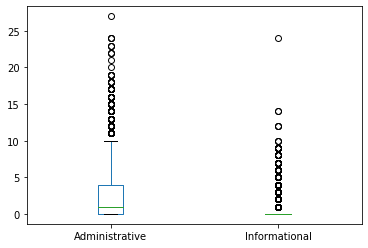

In [5]:
train[["Administrative","Informational"]].plot.box()

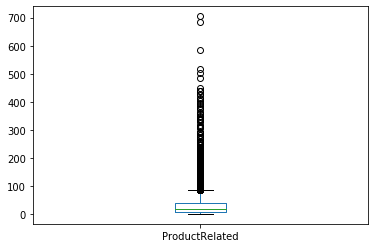

In [6]:
train[["ProductRelated"]].plot.box()

Administrative: 資料分布由0-27,中位數1,平均2.3,屬右偏分佈

Informational:資料分布由0-24,中位數0,平均0.5,屬右偏分佈

ProductRelated:資料分布由0-705,中位數18,平均31.8,屬右偏分佈

三者皆有偏差值outliar狀況

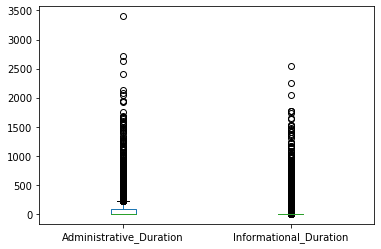

In [7]:
train[["Administrative_Duration","Informational_Duration"]].plot.box()

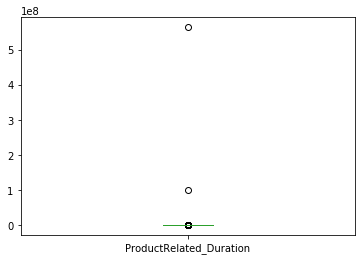

In [8]:
train[["ProductRelated_Duration"]].plot.box()

Administrative_Duration：資料分布由0-3398,中位數7,平均80.9,屬右偏分佈

Informational_Duration:資料分布由0-2549,中位數0,平均32,屬右偏分佈

ProductRelated_Duration:資料分布由0-563492400,中位數598,平均83115.49,屬右偏分佈

三者皆有偏差值outliar狀況

In [9]:
# numerical data distribution on pages values
train[["BounceRates", "ExitRates","PageValues", "SpecialDay"]].describe()

,BounceRates,ExitRates,PageValues,SpecialDay
count,8100.000000,8100.000000,8100.000000,8100.000000
mean,0.020345,0.042699,5.744406,0.060469
std,0.131949,0.047943,17.940567,0.197809
min,-11.000000,0.000000,0.000000,0.000000
25%,0.000000,0.014286,0.000000,0.000000
50%,0.003202,0.025129,0.000000,0.000000
75%,0.016925,0.050000,0.000000,0.000000
max,0.200000,0.200000,287.953793,1.000000


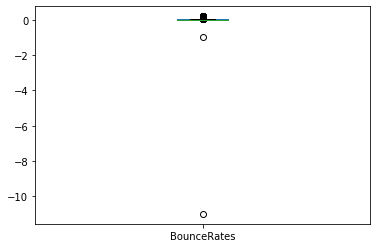

In [10]:
train[["BounceRates"]].plot.box()

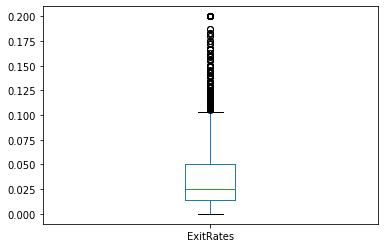

In [11]:
train[["ExitRates"]].plot.box()

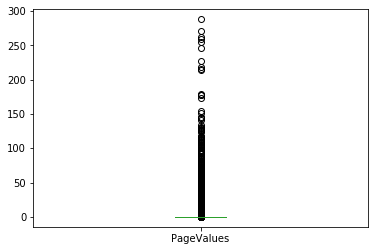

In [12]:
train[["PageValues"]].plot.box()

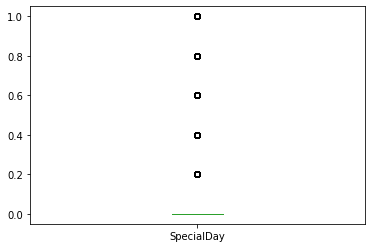

In [13]:
train[["SpecialDay"]].plot.box()

BounceRates: 資料分布由-11-0.2,中位數0.003,平均0.02,屬右偏分佈

ExitRates: 資料分布由0-0.2,中位數0.025,平均0.04,屬右偏分佈

PageValues: 資料分布由0-297.9,中位數0,平均5.7,屬右偏分佈

SpecialDay: 資料分布由0-1,中位數0,平均0.06,屬右偏分佈


# 前處理
## 處理missing value

In [14]:
# check missing value of each numerical column
train.isnull().sum()

ID                         0
Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    1
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           1
Browser                    1
Region                     1
TrafficType                1
VisitorType                1
Weekend                    0
Revenue                    0
dtype: int64

In [15]:
# rpeplace missing value with its mean (numerical)
train['ProductRelated_Duration'] = train['ProductRelated_Duration'].fillna((train['ProductRelated_Duration'].mean()))

#drop missing value (categorical)
train = train.dropna()

# recheck missing value of each column
train.isnull().sum()

ID                         0
Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [16]:
# check missing value of each numerical column in testing data
test.isnull().sum()

ID                         0
Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
dtype: int64

In [17]:
# 檢查屬性值並轉換catrgorical data into one-hot encoding 
# 然而因為來不及確認這些列舉性資料欄位的資料分布以及如何處理這些看起來非正常值的欄位 因此先以資料原本樣子訓練

#train['Month'].unique() #array([ 2,  9,  8,  4,  6,  5,  1,  7,  3,  0, 13]) *0和13非正常值
#test['Month'].unique() #array([8, 9, 2, 1, 3, 5, 6, 7, 4, 0]) *0非正常值
#train['OperatingSystems'].unique() #array([3., 1., 5., 0., 4., 6., 7., 2.])
#test['OperatingSystems'].unique() #array([3, 1, 5, 0, 4, 7, 6])
#train['Browser'].unique() # array([11., 10.,  1.,  3.,  9.,  5.,  6.,  7.,  8.,  0.,  4., 12.,  2.])
#test['Browser'].unique() # array([10,  3,  7,  1,  4,  8, 11,  9,  6,  5])
#train['Region'].unique() # array([3., 0., 1., 6., 5., 7., 2., 4., 8.])
#test['Region'].unique() # array([0, 2, 1, 6, 5, 3, 4, 8, 7])
#train['TrafficType'].unique() # array([ 7.,  8., 14.,  4., 15., 12.,  5.,  2., 18.,  6., 11.,  3., 13., 16., 10., 19.,  1.,  0., 17.,  9.])
#test['TrafficType'].unique() # array([ 5,  4,  7,  8, 15, 12,  2, 11, 14, 10,  3, 19, 18, 16,  1, 13])
#train['VisitorType'].unique() #array([2., 1., 0.])
#test['VisitorType'].unique() #array([2, 1, 0])

# 以one hot encoding結合,
#mon_d = pd.get_dummies(train["Month"],prefix="Month")
#train = pd.concat([train, mon_d], axis=1, join="inner")
#train= train.drop(["Month_0"],axis=1)  #本來想刪除這些非正常值
#train= train.drop(["Month_13"],axis=1) #本來想刪除這些非正常值
#mon_t = pd.get_dummies(test["Month"],prefix="Month")
#test = pd.concat([test, mon_t], axis=1, join="inner")
#ope_d = pd.get_dummies(train["OperatingSystems"],prefix="OperatingSystems")
#train = pd.concat([train, ope_d], axis=1, join="inner")
#ope_t = pd.get_dummies(test["OperatingSystems"],prefix="OperatingSystems")
#test = pd.concat([test, ope_t], axis=1, join="inner")
#bro_d = pd.get_dummies(train["Browser"],prefix="Browser")
#train = pd.concat([train, bro_d], axis=1, join="inner")
#bro_t = pd.get_dummies(test["Browser"],prefix="Browser")
#test = pd.concat([test, bro_t], axis=1, join="inner")
#reg_d = pd.get_dummies(train["Region"],prefix="Region")
#train = pd.concat([train, reg_d], axis=1, join="inner")
#reg_t = pd.get_dummies(test["Region"],prefix="Region")
#test = pd.concat([test, reg_t], axis=1, join="inner")
#reg_d = pd.get_dummies(train["TrafficType"],prefix="TrafficType")
#train = pd.concat([train, reg_d], axis=1, join="inner")
#reg_t = pd.get_dummies(test["TrafficType"],prefix="TrafficType")
#test = pd.concat([test, reg_t], axis=1, join="inner")
#vis_d = pd.get_dummies(train["VisitorType"],prefix="VisitorType")
#train = pd.concat([train, vis_d], axis=1, join="inner")
#vis_t = pd.get_dummies(test["VisitorType"],prefix="VisitorType")
#test = pd.concat([test, vis_t], axis=1, join="inner")

# 將原本的欄位刪除
#train= train.drop(["Month"],axis=1)
#test= test.drop(["Month"],axis=1)
#train= train.drop(["OperatingSystems"],axis=1)
#test= test.drop(["OperatingSystems"],axis=1)
#train= train.drop(["Browser"],axis=1)
#test= test.drop(["Browser"],axis=1)
#train= train.drop(["Region"],axis=1)
#test= test.drop(["Region"],axis=1)
#train= train.drop(["TrafficType"],axis=1)
#test= test.drop(["TrafficType"],axis=1)
#train= train.drop(["VisitorType"],axis=1)
#test= test.drop(["VisitorType"],axis=1)

## exclude outliar

In [18]:
# 針對連續性資料保留 quantile 10%-90%區間資料來剔除偏差值
cols = train.columns

Q1 = train[cols].quantile(0.05)
Q3 = train[cols].quantile(0.95)
IQR = Q3 - Q1

train = train[~((train[cols] < (Q1 - 1.5 * IQR)) |(train[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [19]:
#training feature跟target分開
target = train.Revenue
train = train.drop(['Revenue'], axis=1)

In [20]:
train

,ID,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
0,8773,0,0.000000,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.4,2,3.0,11.0,3.0,7.0,2.0,0
1,6709,0,0.000000,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,9,1.0,10.0,0.0,8.0,2.0,0
2,1463,9,301.000000,0,0.0,38,2621.621429,0.021212,0.044508,10.721172,0.0,8,1.0,10.0,0.0,14.0,2.0,0
3,4095,2,13.333333,0,0.0,105,2062.443592,0.012205,0.020276,0.000000,0.6,2,5.0,10.0,0.0,7.0,2.0,0
4,3346,0,0.000000,0,0.0,19,220.384849,0.010526,0.024642,0.000000,0.0,2,1.0,1.0,0.0,7.0,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8095,3758,0,0.000000,0,0.0,4,81.000000,0.000000,0.050000,0.000000,0.4,2,1.0,1.0,5.0,7.0,2.0,0
8096,4437,1,15.200000,2,62.6,84,4941.698611,0.017647,0.038706,0.000000,0.0,6,3.0,11.0,1.0,8.0,2.0,0
8097,7449,0,0.000000,0,0.0,25,701.883333,0.000000,0.023333,0.000000,0.0,6,1.0,10.0,0.0,4.0,2.0,0
8098,665,9,183.785714,1,90.0,95,3346.501984,0.002118,0.018656,5.932009,0.0,8,5.0,10.0,5.0,4.0,2.0,0


In [21]:
# 針對test資料保留原始分佈
# 由於未提供test的Revenue資訊因此用training做自我測試
test

,ID,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
0,6162,0,0.0,0,0.0,12,482.500000,0.020000,0.040000,0.000000,0.0,8,3,10,0,5,2,0
1,8143,3,33.0,0,0.0,17,386.416667,0.000000,0.010000,0.000000,0.0,9,1,10,0,4,1,0
2,5571,0,0.0,0,0.0,9,154.800000,0.018182,0.030303,20.749351,0.0,8,3,3,2,4,2,0
3,3933,5,79.0,1,12.0,54,1603.333333,0.005085,0.025424,0.000000,0.4,2,1,10,1,7,2,0
4,934,2,17.0,1,105.0,9,148.250000,0.020000,0.022000,0.000000,0.0,1,5,10,0,8,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,5887,2,738.0,0,0.0,26,1840.666667,0.008000,0.042000,0.000000,0.0,2,1,10,3,14,2,0
896,5273,0,0.0,2,26.5,149,6001.171475,0.004000,0.022011,0.000000,0.0,8,1,10,0,4,2,0
897,5833,0,0.0,0,0.0,2,0.000000,0.200000,0.200000,0.000000,0.6,2,3,3,0,12,2,0
898,2119,0,0.0,0,0.0,15,263.250000,0.013333,0.040000,0.000000,0.0,8,3,3,6,5,2,1


In [22]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(train, target, test_size = 0.4, random_state = 0)

#  feature scaling

In [23]:
# 由於資料範圍分布差異大，因此透過feature scaling針對feature做標準化，避免資料分布範圍差異過大影響結果

sc = StandardScaler()
train_sc = sc.fit_transform(X_train)
test_sc = sc.fit_transform(X_test)
test_data = sc.fit_transform(test)

在資料分析前處理過程中，透過觀察資料分布及偏差值缺值分別做處理，以及透過標準化來使資料分布區間一致

原先的training data經過前處理後變成 3273 rows × 18 columns

原先的testing data經過前處理後變成 900 rows × 18 columns

# Modeling

### 透過LogisticRegression預測

In [24]:
clf = LogisticRegression(random_state=0).fit(train_sc, y_train)

In [25]:
clf.score(test_sc, y_test)

0.878982941744448

In [26]:
y_pred = clf.predict(test_sc)
print("accuracy: "+str(metrics.accuracy_score(y_test, y_pred)))
print("precision: "+str(metrics.precision_score(y_test, y_pred)))
print("recall: "+str(metrics.recall_score(y_test, y_pred)))
print("f1_score: "+str(metrics.f1_score(y_test, y_pred)))

accuracy: 0.878982941744448
precision: 0.7649572649572649
recall: 0.358
f1_score: 0.48773841961852854


### 透過KNeighborsClassifier預測

In [27]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(train_sc, y_train)
neigh.score(test_sc, y_test)

0.8609591245574509

In [28]:
y_pred = neigh.predict(test_sc)
print("accuracy: "+str(metrics.accuracy_score(y_test, y_pred)))
print("precision: "+str(metrics.precision_score(y_test, y_pred)))
print("recall: "+str(metrics.recall_score(y_test, y_pred)))
print("f1_score: "+str(metrics.f1_score(y_test, y_pred)))

accuracy: 0.8609591245574509
precision: 0.6297709923664122
recall: 0.33
f1_score: 0.4330708661417323


### 透過DecisionTree預測

In [29]:
tre = tree.DecisionTreeClassifier()
tre.fit(train_sc, y_train)
tre.score(test_sc, y_test)

0.8480849694238816

In [30]:
y_pred = tre.predict(test_sc)
print("accuracy: "+str(metrics.accuracy_score(y_test, y_pred)))
print("precision: "+str(metrics.precision_score(y_test, y_pred)))
print("recall: "+str(metrics.recall_score(y_test, y_pred)))
print("f1_score: "+str(metrics.f1_score(y_test, y_pred)))

accuracy: 0.8480849694238816
precision: 0.5282258064516129
recall: 0.524
f1_score: 0.5261044176706827


### 透過MLPRegressor預測

In [31]:
regr = MLPRegressor(random_state=1, max_iter=500).fit(X_train, y_train)
regr.score(test_sc, y_test)

-4.507240647889837

In [32]:
y_pred = tre.predict(test_sc)
print("accuracy: "+str(metrics.accuracy_score(y_test, y_pred)))
print("precision: "+str(metrics.precision_score(y_test, y_pred)))
print("recall: "+str(metrics.recall_score(y_test, y_pred)))
print("f1_score: "+str(metrics.f1_score(y_test, y_pred)))

accuracy: 0.8480849694238816
precision: 0.5282258064516129
recall: 0.524
f1_score: 0.5261044176706827


### 透過MLPClassifier預測

In [33]:
clf = MLPClassifier(random_state=1, max_iter=300).fit(X_train, y_train)
clf.score(test_sc, y_test)

0.49372384937238495

In [34]:
y_pred = clf.predict(test_sc)
print("accuracy: "+str(metrics.accuracy_score(y_test, y_pred)))
print("precision: "+str(metrics.precision_score(y_test, y_pred)))
print("recall: "+str(metrics.recall_score(y_test, y_pred)))
print("f1_score: "+str(metrics.f1_score(y_test, y_pred)))

accuracy: 0.49372384937238495
precision: 0.21896280775275012
recall: 0.836
f1_score: 0.34703196347031956


綜合以上數種模型的預測結果以及使用各種評量方式衡量結果

LogisticRegression, KNeighborsClassifier, DecisionTree, MLPRegressor在accuracy的表現上相較於MLPClassifier都不錯 

而MLPClassifier反而在recall值表現得最好，也就是代表能夠正確地預測最多比例的原始資料

LogisticRegression是各項模型中分數表現最好的因此被用來當作預測testing data

### Testing cases

In [37]:
y_pred = clf.predict(test_data)
df = pd.DataFrame(y_pred, columns = ['HasRevenue'])
df.index.name="ID"
df

,HasRevenue
ID,
0,1
1,1
2,1
3,0
4,0
...,...
895,0
896,1
897,0


In [36]:
df.to_csv("sample_submission_peihsuan.csv")